# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Assyifa Rahma Habibah
- **Email:** assyifarahmahabibah@gmail.com
- **ID Dicoding:** assyifarahmahabibah

## Menentukan Pertanyaan Bisnis

- Bagaimana analisi petumbuhan pengguna berdasarkan bulan setiap tahunnya?
- Bagaimana pengaruh musim terhadap volume pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [348]:
day_df = pd.read_csv ("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [310]:
hour_df = pd.read_csv ("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan terdiri atas datasets day.csv dan hour.csv
- Data mencangkup waktu, cuaca dan jumlah sewa

### Assessing Data

In [311]:
# Dataset Day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [312]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [313]:
print ("Jumlah duplikat: ", day_df.duplicated().sum())

Jumlah duplikat:  0


In [314]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [315]:
# Dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [316]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [317]:
print("Jumlah duplikat: ", hour_df.duplicated().sum())

Jumlah duplikat:  0


In [318]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value, duplikat dan inaccurate value pada kedua dataset
- Kolom dteday memiliki tipe data yang salah
- Format season, year, hour, holiday, weekdays memiliki format yang masih sulit dipahami

### Cleaning Data

In [349]:
# Mengganti nama kolom agar mudah dipahami
day_df.rename(columns={
    'instant':'id', 
    'dteday':'date', 
    'yr':'year', 
    'mnth':'month', 
    'weathersit':'weather', 
    'cnt':'count'}, 
    inplace=True)
day_df.head()

,id,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [350]:
# #Menghapus kolom yang tidak diperlukan untuk analisis
day_df_drop =['temp','hum','windspeed']
day_df.drop (day_df_drop, axis=1, inplace=True)
day_df.head()

,id,date,season,year,month,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.363625,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.353739,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.189405,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.212122,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.229270,82,1518,1600


In [351]:
# Mengganti tipe data 
day_df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']] = day_df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']].apply(lambda x: x.astype('category'))
day_df['date'] = day_df['date'].astype('datetime64[ns]')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   atemp       731 non-null    float64       
 10  casual      731 non-null    int64         
 11  registered  731 non-null    int64         
 12  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(1), int64(4)
memory usage: 40.8 KB


In [352]:
# Mengubah isi kolom
replacements = {
    'season': {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'},
    'year': {0: 2011, 1: 2012},
    'month' : {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'},
    'holiday': {0: 'not holiday', 1: 'holiday'},
    'weekday': {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'},
    'workingday': {0: 'restday', 1: 'workday'},
    'weather': {1: 'clear & partly cloudy', 2: 'mist & cloudy', 3: 'light snow & light rain', 4: 'heavy rain & ice pellets'}
}

for col, mapping in replacements.items():
    day_df[col] = day_df[col].map(mapping)

day_df.head()

,id,date,season,year,month,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,springer,2011,Januari,not holiday,saturday,restday,mist & cloudy,0.363625,331,654,985
1,2,2011-01-02,springer,2011,Januari,not holiday,sunday,restday,mist & cloudy,0.353739,131,670,801
2,3,2011-01-03,springer,2011,Januari,not holiday,monday,workday,clear & partly cloudy,0.189405,120,1229,1349
3,4,2011-01-04,springer,2011,Januari,not holiday,tuesday,workday,clear & partly cloudy,0.212122,108,1454,1562
4,5,2011-01-05,springer,2011,Januari,not holiday,wednesday,workday,clear & partly cloudy,0.229270,82,1518,1600


In [323]:
# Dataset hour_df
# Mengganti nama kolom agar mudah dipahami
hour_df.rename(columns={
    'instant':'id', 
    'dteday':'date', 
    'yr':'year', 
    'mnth':'month', 
    'hr':'hour',
    'weathersit':'weather', 
    'cnt':'count'}, 
    inplace=True)
hour_df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [324]:
# Mengapus kolom yang tidak diperlukan untuk analisis
hour_df_drop =['temp', 'hum', 'windspeed']
hour_df.drop (hour_df_drop, axis=1, inplace=True)
hour_df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2879,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2727,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2727,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2879,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2879,0,1,1


In [325]:
# Mengganti tipe data 
hour_df[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']] = hour_df[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']].apply(lambda x: x.astype('category'))
hour_df['date'] = hour_df['date'].astype('datetime64[ns]')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  atemp       17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  count       17379 non-null  int64         
dtypes: category(8), datetime64[ns](1), float64(1), int64(4)
memory usage: 952.8 KB


In [326]:
# Mengubah isi kolom 
replacements = {
    'season': {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'},
    'year': {0: 2011, 1: 2012},
    'month' : {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'},
    'holiday': {0: 'not holiday', 1: 'holiday'},
    'weekday': {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'},
    'workingday': {0: 'restday', 1: 'workday'},
    'weather': {1: 'clear & partly cloudy', 2: 'mist & cloudy', 3: 'light snow & light rain', 4: 'heavy rain & ice pellets'},
    'hour': { 0: '12 am', 1: '1 am', 2: '2 am', 3: '3 am', 4: '4 am', 5: '5 am', 6: '6 am', 7: '7 am', 8: '8 am', 9: '9 am', 10: '10 am', 11: '11 am', 
             12: '12 pm', 13: '1 pm', 14: '2 pm', 15: '3 pm', 16: '4 pm', 17: '5 pm', 18: '6 pm', 19: '7 pm', 20: '8 pm', 21: '9 pm', 22: '10 pm', 23: '11 pm'
    }
}

for col, mapping in replacements.items():
    if col in hour_df.columns: 
        hour_df[col] = hour_df[col].map(mapping)

hour_df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,atemp,casual,registered,count
0,1,2011-01-01,springer,2011,Januari,12 am,not holiday,saturday,restday,clear & partly cloudy,0.2879,3,13,16
1,2,2011-01-01,springer,2011,Januari,1 am,not holiday,saturday,restday,clear & partly cloudy,0.2727,8,32,40
2,3,2011-01-01,springer,2011,Januari,2 am,not holiday,saturday,restday,clear & partly cloudy,0.2727,5,27,32
3,4,2011-01-01,springer,2011,Januari,3 am,not holiday,saturday,restday,clear & partly cloudy,0.2879,3,10,13
4,5,2011-01-01,springer,2011,Januari,4 am,not holiday,saturday,restday,clear & partly cloudy,0.2879,0,1,1


**Insight:**
- Nama kolom sudah lebih mudah dibaca dan dipahami
- Kolom sudah berisi data yang lebih mudah dipahami
- Tipe data sudah diubah sesuai semestinya

## Exploratory Data Analysis (EDA)

### Explore 

In [327]:
day_df.describe(include="all")

,id,date,season,year,month,holiday,weekday,workingday,weather,atemp,casual,registered,count
count,731.000000,731,731,731.0,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2,7,2,3,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,Januari,not holiday,sunday,workday,clear & partly cloudy,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710,105,500,463,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474354,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079070,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337842,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.486733,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608602,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.840896,3410.000000,6946.000000,8714.000000


In [328]:
# Mengelompokkan berdasarkan season
day_df.groupby(by='season', observed=True).registered.nunique().sort_values(ascending=False)

season
fall        181
summer      180
springer    177
winter      177
Name: registered, dtype: int64

In [329]:
# Mengelompkkan berdasarkan hari untuk mengetahui jumlah total perharinya
day_df.groupby(by='weekday', observed=True).agg({
    "registered":"sum",
    "casual":"sum",
    "count":"sum"
}).sort_values(by="count", ascending=False)

,registered,casual,count
weekday,,,
friday,409552,78238,487790
thursday,423935,61460,485395
saturday,323955,153852,477807
wednesday,415729,57319,473048
tuesday,411266,57843,469109
monday,384719,70784,455503
sunday,303506,140521,444027


In [330]:
# Mengelompokkan berdasarkan kategori workingday
day_df.groupby(by='workingday', observed=True).registered.nunique().sort_values(ascending=False)

workingday
workday    476
restday    223
Name: registered, dtype: int64

In [331]:
# mengidentifikasi tren pengguna terdaftar vs casual 
day_df.groupby("date").agg({
    "registered": "sum",
    "casual": "sum"
}).reset_index().head()

,date,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82


In [ ]:
# Berdasarkan musim, mengetahui berapa banyak pengguna terdaftar dan tidak 
day_df.groupby('season', observed=True).agg({
    "casual":"sum",
    "registered":"sum",
    "count":"sum"
}).reset_index().sort_values(by="count", ascending=False)

,season,casual,registered,count
2,fall,226091,835038,1061129
1,summer,203522,715067,918589
3,winter,129782,711831,841613
0,springer,60622,410726,471348


In [333]:
# mengidentifikasi jumah pengguna max min berdasarkan holiday
day_df.groupby(by= "holiday").agg({
    "casual" : ["max", "min"],
    "registered" : ["max", "min"]
}).reset_index()

C:\Users\zc\AppData\Local\Temp\ipykernel_19960\2202505345.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by= "holiday").agg({


holiday casual      registered     
                  max  min        max  min
0  not holiday   3410    2       6946   20
1      holiday   3065  117       5172  573

In [334]:
# mengetahui hubungan cuaca dengan jumlah pengguna
day_df.groupby(by="weather", observed=True).agg({
    "casual" : "mean",
    "registered" :"mean",
    "count" : "mean"
}).reset_index(). sort_values(by="count", ascending=False)

,weather,casual,registered,count
0,clear & partly cloudy,964.030238,3912.755940,4876.786177
1,mist & cloudy,687.352227,3348.510121,4035.862348
2,light snow & light rain,185.476190,1617.809524,1803.285714


In [ ]:
# Berdasarkan tahun, mengetahui berapa banyak pengguna pendaftar dan tidak mendaftar
day_df.groupby('year', observed=True).agg({
    "casual":"sum",
    "registered":"sum",
    "count" : "sum"
}).reset_index().sort_values(by="count", ascending=False)

,year,casual,registered,count
1,2012,372765,1676811,2049576
0,2011,247252,995851,1243103


In [336]:
#Mengelompokkan data berdasarkan 'month'
day_df.groupby(by='month', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'count': 'sum'
}).sort_values(by='count', ascending=False)

,registered,casual,count
month,,,
Agustus,279155,72039,351194
Juni,272436,73906,346342
September,275668,70323,345991
Juli,266791,78157,344948
Mei,256401,75285,331686
Oktober,262592,59760,322352
April,208292,60802,269094
November,218228,36603,254831
Maret,184476,44444,228920


In [337]:
hour_df.describe(include="all")

,id,date,season,year,month,hour,holiday,weekday,workingday,weather,atemp,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,24,2,7,2,4,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,Juli,4 pm,not holiday,saturday,workday,clear & partly cloudy,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,730,16879,2512,11865,11413,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475775,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484800,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621200,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,367.000000,886.000000,977.000000


In [338]:
# Pola penyewaan berdasarkan jam
hour_df.groupby(by="hour").agg({
    "casual" : "sum",
    "registered" :"sum",
    "count":"sum"
}).reset_index().sort_values(by='count', ascending=False)

C:\Users\zc\AppData\Local\Temp\ipykernel_19960\127562423.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="hour").agg({


,hour,casual,registered,count
17,5 pm,54220,282640,336860
18,6 pm,44496,265276,309772
8,8 am,15761,245240,261001
16,4 pm,53834,173914,227748
19,7 pm,35505,191284,226789
13,1 pm,52713,132206,184919
12,12 pm,49718,134696,184414
15,3 pm,54606,128543,183149
14,2 pm,55089,120563,175652
20,8 pm,26378,138172,164550


In [358]:
# menemukan pola berdasarkan jam pada hari kerja
hour_df.groupby(["hour", "workingday"]).agg({
    "count" : "sum"
}).reset_index()

C:\Users\zc\AppData\Local\Temp\ipykernel_19960\754612580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(["hour", "workingday"]).agg({


,hour,workingday,count
0,12 am,restday,20884
1,12 am,workday,18246
2,1 am,restday,15987
3,1 am,workday,8177
4,2 am,restday,12123
5,2 am,workday,4229
6,3 am,restday,5851
7,3 am,workday,2323
8,4 am,restday,1876
9,4 am,workday,2552


In [339]:
# mengetahui hubungan cuaca dengan jumlah pengguna
hour_df.groupby(by="atemp", observed=True).agg({
    "count" : "sum",
}).reset_index().sort_values(by="count", ascending=False)

,atemp,count
41,0.6212,311459
43,0.6515,162997
44,0.6667,155734
40,0.6061,129150
46,0.6970,127608
...,...,...
62,0.9545,115
2,0.0303,111
64,1.0000,101
0,0.0000,39


**Insight:**
#### 1. Berdasarkan Tahun:
- Tahun 2012 menunjukkan peningkatan yang signifikan dalam jumlah pengguna sepeda dibandingkan dengan tahun 2011. Hal ini mengindikasikan adanya pertumbuhan positif dalam minat masyarakat terhadap layanan penyewaan sepeda.
#### 2. Berdasarkan Musim:
- Musim gugur (fall) mencatat jumlah pengguna tertinggi dibandingkan dengan musim lainnya. Hal ini mungkin dipengaruhi oleh cuaca yang lebih nyaman dan kondisi lingkungan yang mendukung aktivitas bersepeda.
#### 3. Berdasarkan Bulan:
- Bulan Agustus menjadi bulan dengan jumlah pengguna sepeda tertinggi. Peningkatan ini kemungkinan besar disebabkan oleh cuaca yang cerah dan liburan musim panas yang mendorong aktivitas luar ruangan.
#### 4. Berdasarkan Mingguan:
- Hari Jumat menonjol sebagai hari dengan jumlah pengguna sepeda yang paling tinggi dibandingkan hari-hari lainnya dalam seminggu. Hal ini mungkin terkait dengan aktivitas akhir pekan yang dimulai pada hari tersebut.
#### 5. Berdasarkan Pola Harian:
- Penggunaan sepeda lebih tinggi pada hari kerja (workday) dibandingkan dengan hari libur (restday). Hal ini menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi untuk keperluan sehari-hari, seperti pergi ke tempat kerja atau sekolah.
#### 6. Berdasarkan Waktu:
- Pukul 17.00 (5 PM) merupakan waktu dengan jumlah pengguna sepeda tertinggi. Hal ini kemungkinan besar terkait dengan jam pulang kerja atau sekolah, di mana masyarakat memilih sepeda sebagai alternatif transportasi.
#### 7. Berdasarkan Kondisi Cuaca:
- Pengguna sepeda cenderung lebih banyak pada kondisi cuaca cerah (clear & partly cloudy). Cuaca yang baik menjadi faktor pendorong utama bagi masyarakat untuk menggunakan sepeda.
#### 8. Berdasarkan Kategori Pengguna:
- Mayoritas pengguna sepeda adalah individu yang telah berlangganan layanan ini secara rutin (registered). Hal ini menunjukkan bahwa layanan 
penyewaan sepeda memiliki basis pelanggan yang loyal.
#### 9. Berdasarkan Jam dan Workday
- Penggunaan meningkat di pagi hari dan sore hari pada hari kerja, kemungkinan karena aktivitas rutin seperti pergi dan pulang kerja/sekolah.  Hari libur memiliki pola yang lebih merata, tanpa lonjakan tajam seperti di hari kerja. Waktu puncak pengguna terjadi pada sore hari, terutama pukul 5 pm.
#### 10. Berdasarkan Suhu yang Dirasakan (Atemp):
- Suhu yang dirasakan (atemp) memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda. Suhu yang nyaman cenderung meningkatkan minat masyarakat untuk bersepeda, sementara suhu yang terlalu rendah atau tinggi dapat mengurangi jumlah pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana analisi petumbuhan pengguna berdasarkan bulan setiap tahunnya?


C:\Users\zc\AppData\Local\Temp\ipykernel_19960\1159170783.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_growth = day_df.groupby(['year', 'month'])['count'].sum().reset_index()


   year     month   count
0  2011   Januari   38189
1  2011  Februari   48215
2  2011     Maret   64045
3  2011     April   94870
4  2011       Mei  135821


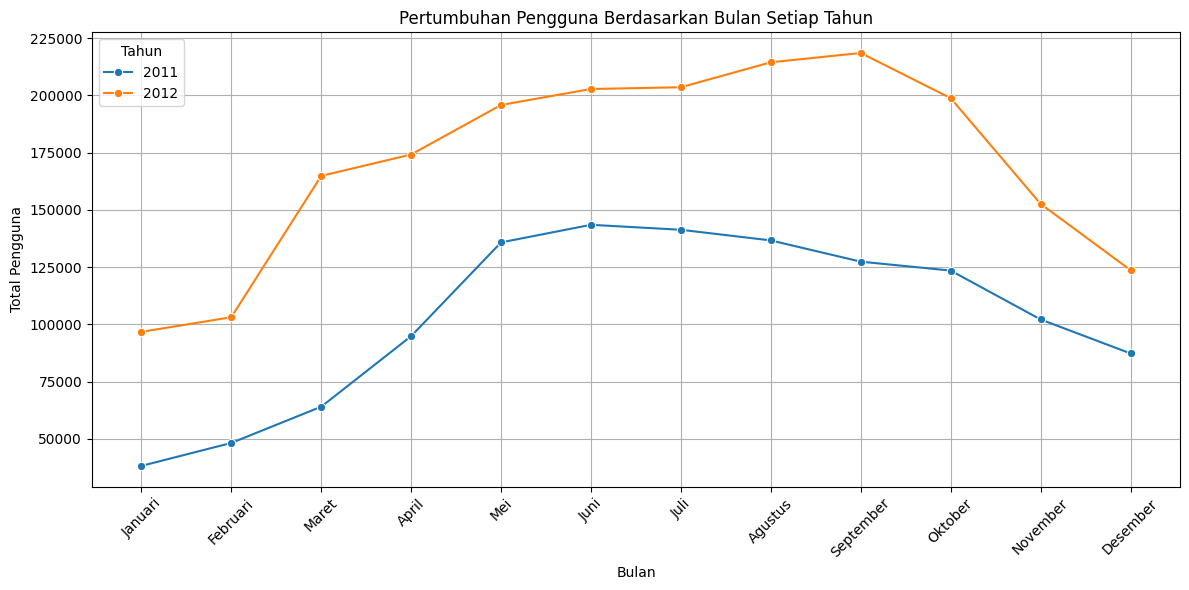

In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by tahun dan bulan, lalu hitung total pengguna
monthly_growth = day_df.groupby(['year', 'month'])['count'].sum().reset_index()

# Pastikan kolom 'month' tetap dalam bentuk kategori yang benar
month_order = [
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
]

monthly_growth['month'] = pd.Categorical(monthly_growth['month'], categories=month_order, ordered=True)

# Mengurutkan data berdasarkan tahun dan bulan
monthly_growth = monthly_growth.sort_values(['year', 'month'])

# Debug: Pastikan data tidak kosong dan sudah terurut
print(monthly_growth.head())

# Visualisasi pertumbuhan pengguna
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_growth, x='month', y='count', hue='year', marker='o')

plt.title('Pertumbuhan Pengguna Berdasarkan Bulan Setiap Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Pengguna')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Tahun', loc='upper left')  # Posisikan legend agar tidak menutupi grafik
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh musim terhadap volume pengguna sepeda?

C:\Users\zc\AppData\Local\Temp\ipykernel_19960\1239802828.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_total = day_df.groupby('season')['count'].sum().reset_index()
C:\Users\zc\AppData\Local\Temp\ipykernel_19960\1239802828.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_total, x='season', y='count', palette='viridis')


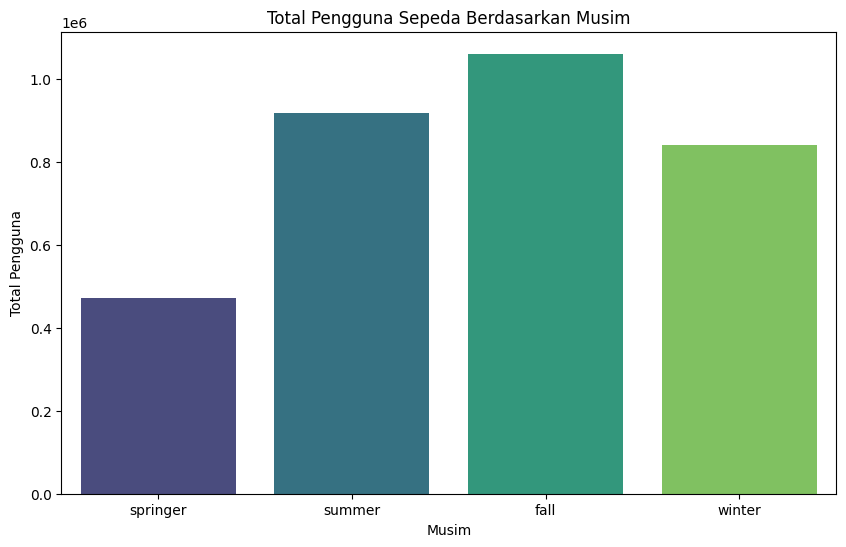

In [354]:
# Menghitung total pengguna per musim
season_total = day_df.groupby('season')['count'].sum().reset_index()

# Mengurutkan musim sesuai urutan yang benar
season_order = ['springer', 'summer', 'fall', 'winter']  
season_total['season'] = pd.Categorical(season_total['season'], categories=season_order, ordered=True)
season_total = season_total.sort_values('season')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=season_total, x='season', y='count', palette='viridis')
plt.title('Total Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Pengguna')
plt.show()

**Insight:**
- Jumlah pengguna pada 2012 selalu lebih tinggi dibanding 2011. Kedua tahun memiliki pola serupa: peningkatan hingga pertengahan tahun, lalu penurunan menjelang akhir tahun. Lonjakan pengguna pada 2012 lebih tajam, dengan puncaknya di September. Penurunan di akhir tahun bisa disebabkan oleh faktor musiman atau kebiasaan pengguna.
- Musim memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda.Penggunaan sepeda paling tinggi pada musim panas dan paling rendah pada musim dingin. Musim semi dan musim gugur memiliki penggunaan sepeda yang sedang, dengan musim gugur cenderung lebih tinggi daripada musim semi.

## Analisis Lanjutan

#### Tujuan Analisis
Tujuan analisis ini adalah untuk memahami hubungan antara suhu yang dirasakan (`atemp`) dan jumlah pengguna sepeda, serta mengidentifikasi pola penggunaan sepeda berdasarkan kategori suhu (Dingin, Sedang, Panas). Dengan mengetahui preferensi pengguna terhadap kondisi suhu tertentu, analisis ini bertujuan untuk memberikan rekomendasi bisnis yang dapat meningkatkan layanan, seperti meningkatkan ketersediaan sepeda pada suhu yang nyaman atau menawarkan promosi pada suhu yang kurang diminati.

#### Metodologi
Analisis dilakukan dengan menggunakan teknik binning (pengelompokan manual) berdasarkan nilai atemp (suhu yang dirasakan). Data dikelompokkan ke dalam tiga kategori suhu:
- Dingin: atemp < 0.3
- Sedang: 0.3 <= atemp < 0.6
- Panas: atemp >= 0.6

C:\Users\zc\AppData\Local\Temp\ipykernel_19960\1193590000.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=atemp_category_total, x='kategori_atemp', y='count', palette='coolwarm')


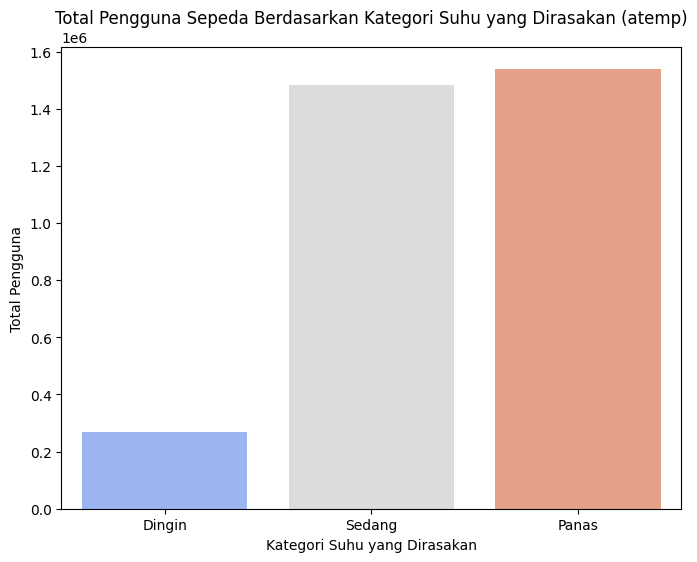

In [355]:
# Fungsi untuk mengkategorikan atemp
def kategori_atemp(atemp):
    if atemp < 0.3:
        return 'Dingin'
    elif 0.3 <= atemp < 0.6:
        return 'Sedang'
    else:
        return 'Panas'

# Membuat kolom baru 'kategori_atemp'
hour_df['kategori_atemp'] = hour_df['atemp'].apply(kategori_atemp)

# Menghitung total pengguna berdasarkan kategori atemp
atemp_category_total = hour_df.groupby('kategori_atemp')['count'].sum().reset_index()

# Mengurutkan kategori atemp (Dingin, Sedang, Panas)
atemp_category_total['kategori_atemp'] = pd.Categorical(atemp_category_total['kategori_atemp'], categories=['Dingin', 'Sedang', 'Panas'], ordered=True)
atemp_category_total = atemp_category_total.sort_values('kategori_atemp')

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=atemp_category_total, x='kategori_atemp', y='count', palette='coolwarm')
plt.title('Total Pengguna Sepeda Berdasarkan Kategori Suhu yang Dirasakan (atemp)')
plt.xlabel('Kategori Suhu yang Dirasakan')
plt.ylabel('Total Pengguna')
plt.show()

#### Insight:
- Suhu yang dirasakan (atemp) memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda.
- Pengguna sepeda cenderung lebih banyak pada suhu yang panas dan sedang, sementara suhu yang dingin mengurangi minat pengguna.

## Conclusion

#### Conclution pertanyaan 1 
Pengguna sepeda menunjukkan peningkatan dari awal tahun hingga pertengahan tahun, dengan puncaknya terjadi pada bulan-bulan musim panas seperti Juni, Juli, dan Agustus, sebelum kemudian menurun menjelang akhir tahun. Pertumbuhan penggunaan sepeda pada tahun 2012 lebih signifikan dibandingkan tahun 2011, terutama selama bulan-bulan musim panas. Penurunan penggunaan di akhir tahun kemungkinan besar dipengaruhi oleh cuaca yang lebih dingin serta adanya hari libur, yang mengurangi minat orang untuk menggunakan sepeda. Dengan memahami tren ini, perusahaan dapat merencanakan strategi yang lebih efektif, seperti meningkatkan ketersediaan sepeda selama periode permintaan tinggi dan menawarkan promosi pada periode penurunan untuk mempertahankan minat pengguna.

#### Conclution pertanyaan 2
Musim memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda. Penggunaan sepeda mencapai puncaknya pada musim panas karena cuaca yang hangat dan cerah mendorong aktivitas luar ruangan. Sebaliknya, penggunaan sepeda paling rendah pada musim dingin akibat cuaca yang dingin dan ekstrem. Sementara itu, musim semi dan musim gugur menunjukkan penggunaan sepeda yang sedang, dengan musim gugur cenderung lebih tinggi daripada musim semi karena cuaca yang masih nyaman dan pemandangan yang menarik. Dengan memahami pola ini, perusahaan dapat mengoptimalkan ketersediaan sepeda dan menyesuaikan strategi bisnis sesuai dengan musim, seperti meningkatkan stok sepeda pada musim panas dan menawarkan promosi pada musim dingin untuk menarik lebih banyak pengguna.